In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise import SVDpp
from surprise import accuracy
from surprise.model_selection import KFold
from adjustText import adjust_text
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D

In [64]:
V_data = np.loadtxt('SVDpp_data.txt').astype(float)
V_data = pd.DataFrame(V_data)
u, s, vh = np.linalg.svd(V_data, full_matrices=True)
projection = u[:, 0:3]

In [65]:
comedies = pd.read_csv('./data/ten_comedies.txt', header = None)
comedies.columns = ["index", "movies"]
c_points = pd.DataFrame(data = projection[comedies["index"]], index = None)
c_points.columns = ["x", "y", "z"]
c_points["movies"] = comedies["movies"]

In [66]:
mysteries = pd.read_csv('./data/ten_mysteries.txt', header = None)
mysteries.columns = ["index", "movies"]
m_points = pd.DataFrame(data = projection[mysteries["index"]], index = None)
m_points.columns = ["x", "y", "z"]
m_points["movies"] = mysteries["movies"]

In [67]:
romances = pd.read_csv('./data/ten_romances.txt', header = None)
romances.columns = ["index", "movies"]
r_points = pd.DataFrame(data = projection[romances["index"]], index = None)
r_points.columns = ["x", "y", "z"]
r_points["movies"] = romances["movies"]

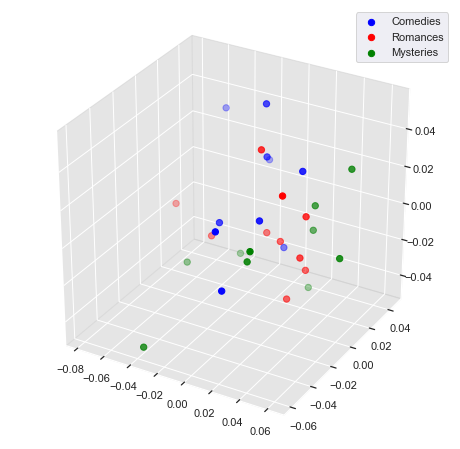

In [69]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 0.5))
ax.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 0.5))
ax.w_zaxis.set_pane_color((0.8, 0.8, 0.8, 0.5))
ax.scatter(c_points["x"], c_points["y"], c_points["z"], c="blue", label = "Comedies", s = 40)
ax.scatter(r_points["x"], r_points["y"], r_points["z"], c="red", label = "Romances", s = 40)
ax.scatter(m_points["x"], m_points["y"], m_points["z"], c="green", label = "Mysteries", s = 40)
ax.legend()
plt.savefig("./plots/3D_SVDpp.png", bbox_inches='tight')